Realizar un estudio de aprendizaje supervisado utilizando los algoritmos bayesianos. Para ello en esta tarea se utilizarán dos datasets.

No quito los outliers para comprobar si los modelos Naive Bayes, independientemente de que no sean los mejores, para comprobar si son buenos ante el ruido en los datos.

**Ejercicio 2.** https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction. Clasificación binaria. El objetivo es clasificar entre presencia de enfermedad del corazón o no a partir de una serie de atributos (edad, sexo, colesterol, etc.). Para ello el dataset contiene una serie de datos pacientes etiquetados si tienen enfermedad o no.

**_Importación de librerías necesarias_**

In [1]:
# Importación de la librerias necesarias
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import pandas as pd
import seaborn as sns
# import matplotlib.pyplot as plt
from google.colab import drive # Librería para Drive

**_Preproceso_**

*Importación de los datos*

In [2]:
# Descomentar si se quiere montar google drive en colab
drive.mount("/content/drive")

# Cambiar la ruta si no se necesita importar los datos desde el drive
df_cardio = pd.read_csv("/content/drive/My Drive/IABD/SAA/Tema 2/Tarea 1/dataset_cardio.csv") # Leo el csv desde el drive, parte de la cadena que no cambia "/content/drive/My Drive/miruta/fichero.*"

Mounted at /content/drive


*Mostrar las primera y últimas filas del data frame importado*

In [3]:
df_cardio
# Colab muestra las primeras y últimas filas, si se hace desde un entorno de ejecución diferente que no se jupiter se haría de la siguiente forma:
# df_vino.head()
# df_vino.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Codifico las etiquetas ya que los modelos Naieve Bayes necesita que los datos estén en formato numérico. Además, nos va a hacer falta también falta para el mapa de calor y el describe.

In [4]:
le = preprocessing.LabelEncoder()
df_cardio["Sex"] = le.fit_transform(df_cardio.Sex.values)
df_cardio["ChestPainType"] = le.fit_transform(df_cardio.ChestPainType.values)
df_cardio["RestingECG"] = le.fit_transform(df_cardio.RestingECG.values)
df_cardio["ExerciseAngina"] = le.fit_transform(df_cardio.ExerciseAngina.values)
df_cardio["ST_Slope"] = le.fit_transform(df_cardio.ST_Slope.values)

*Mostar parámetros estadísticos de los datos (media, desviación típica, quartiles, etc.).*

In [5]:
df_cardio.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


*Mostrar un mapa de calor que indique la correlación entre variables*

<Axes: >

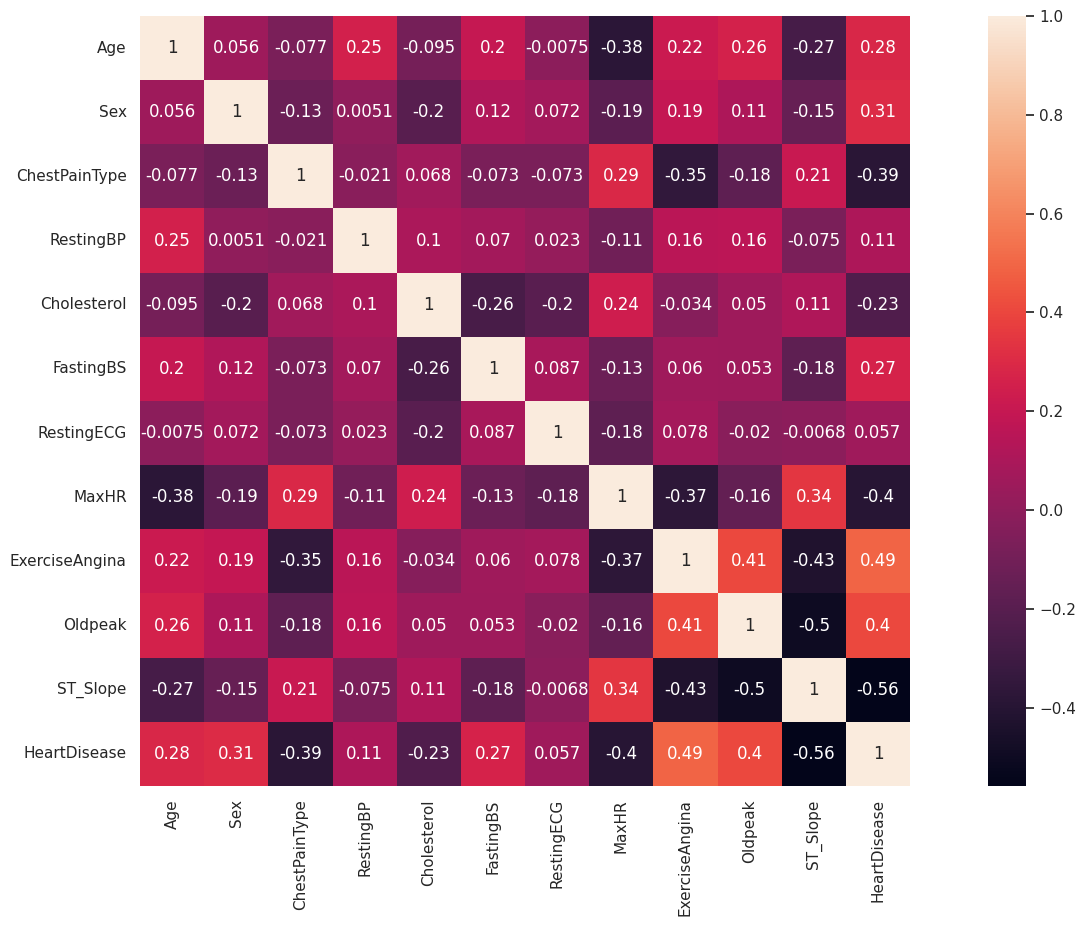

In [6]:
sns.set(rc={"figure.figsize": (20, 10)}) # Esta es una forma de redimensionar el tamaño de la parcela
# plt.figure(figsize=(15, 8)) # Otra forma para redimensionar el tamaño de la parcela
sns.heatmap(df_cardio.corr(), square = True, annot = True)

*Seleccionar las características de entrada y etiquetas (resultados)*

In [7]:
scaler = preprocessing.MinMaxScaler() # Inicializo el MinMaxScaler
x_df_cardio = scaler.fit_transform(df_cardio.drop("HeartDisease", axis=1)) # Elimino el atributo "HeartDisease"
y_df_cardio = df_cardio['HeartDisease'] # Me quedo con todos los datos del atributo "HeartDisease"

*Separar datos entre entrenamiento y prueba (usando un 75% para entrenamiento y 25% test)*

In [8]:
x_entrenamiento, x_test, y_entrenamiento, y_test = train_test_split(x_df_cardio, y_df_cardio, random_state=1)

**_Entrenamiento y predicción_**

- **GuassianNB**

_Elegir, instanciar y entrenar modelo_

In [9]:
modeloGNB = GaussianNB() # 0.860869
modeloGNB.fit(x_entrenamiento, y_entrenamiento)

GaussianNB()

*Realizar una predicción con los datos de prueba*

In [10]:
y_prediccionGNB = modeloGNB.predict(x_test)

**_Evaluación_**

*Mostrar el porcentaje de elementos correctamente clasificados*

In [11]:
print("La probabilidad de acertar es: ", accuracy_score(y_test, y_prediccionGNB))

La probabilidad de acertar es:  0.8608695652173913


*Mostrar la predicción realiza (imprimir la variable con la predicción)*

In [12]:
print(y_prediccionGNB)

[1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1
 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1
 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1
 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 1
 1 1 1 0 0 0 1 0]


*Representar gráficamente la clasificación obtenida (matríz de confusión).*

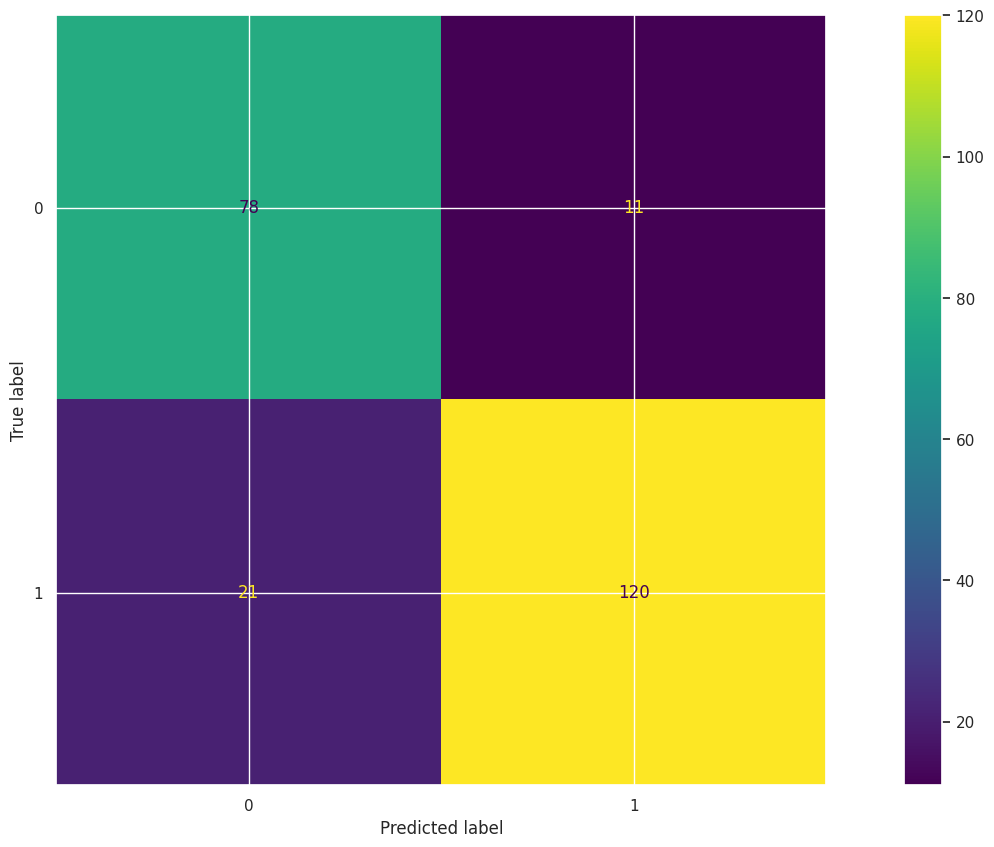

In [13]:
ConfusionMatrixDisplay.from_predictions(y_test, y_prediccionGNB)

- **MultinomialNB**

_Elegir, instanciar y entrenar modelo_

In [14]:
modeloMNB = MultinomialNB() # 0.843478
modeloMNB.fit(x_entrenamiento, y_entrenamiento)

#print((x_entrenamiento < 0).any()) # Compruebo las columnas que tengan un valor negativo

MultinomialNB()

_Realizar una prediccón con los datos de prueba_

In [15]:
y_prediccionMNB = modeloMNB.predict(x_test)

**_Evaluación_**

*Mostrar el porcentaje de elementos correctamente clasificados*

In [16]:
print("La probabilidad de acertar es: ", accuracy_score(y_test, y_prediccionMNB))

La probabilidad de acertar es:  0.8434782608695652


*Mostrar la predicción realiza (imprimir la variable con la predicción)*

In [17]:
print(y_prediccionMNB)

[1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 1 1
 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1
 0 1 1 0 0 0 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1
 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 1
 1 1 1 0 0 0 1 0]


*Representar gráficamente la clasificación obtenida (matríz de confusión).*

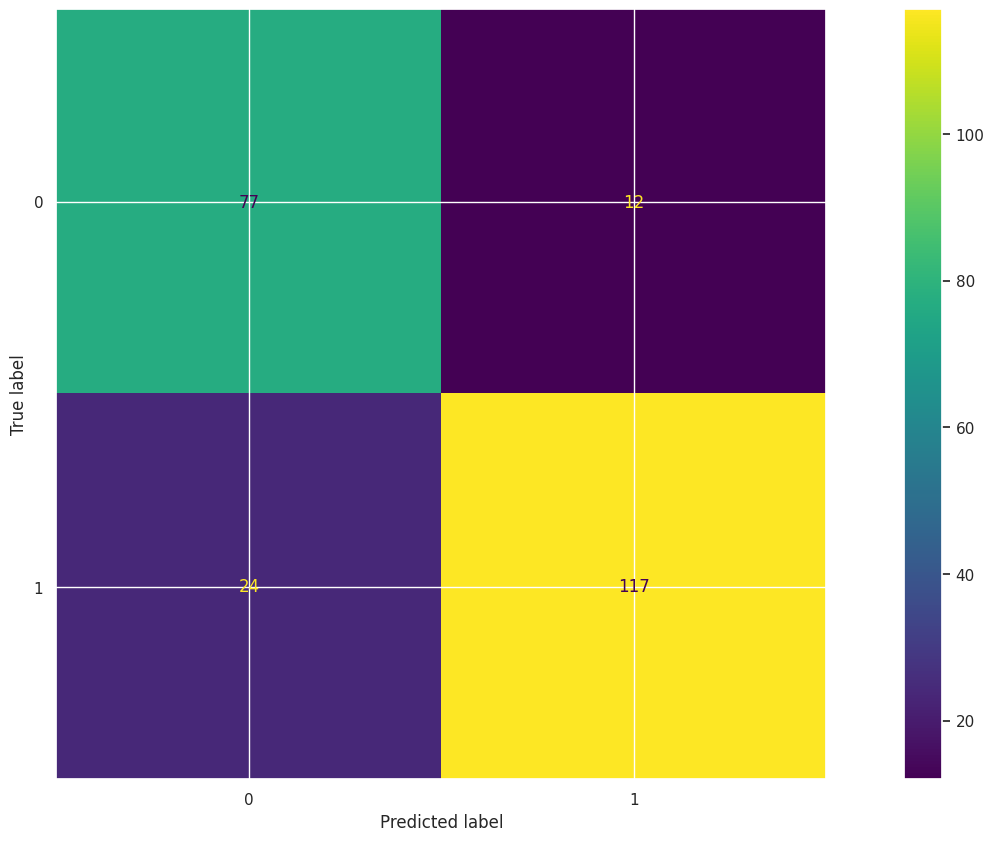

In [18]:
ConfusionMatrixDisplay.from_predictions(y_test, y_prediccionMNB)

- **ComplementNB**

_Elegir, instanciar y entrenar modelo_

In [19]:
modeloCNB = ComplementNB() # 0.834782
modeloCNB.fit(x_entrenamiento, y_entrenamiento)

ComplementNB()

_Realizar una prediccón con los datos de prueba_

In [20]:
y_prediccionCNB = modeloCNB.predict(x_test)

**_Evaluación_**

*Mostrar el porcentaje de elementos correctamente clasificados*

In [21]:
print("La probabilidad de acertar es: ", accuracy_score(y_test, y_prediccionCNB))

La probabilidad de acertar es:  0.8347826086956521


*Mostrar la predicción realiza (imprimir la variable con la predicción)*

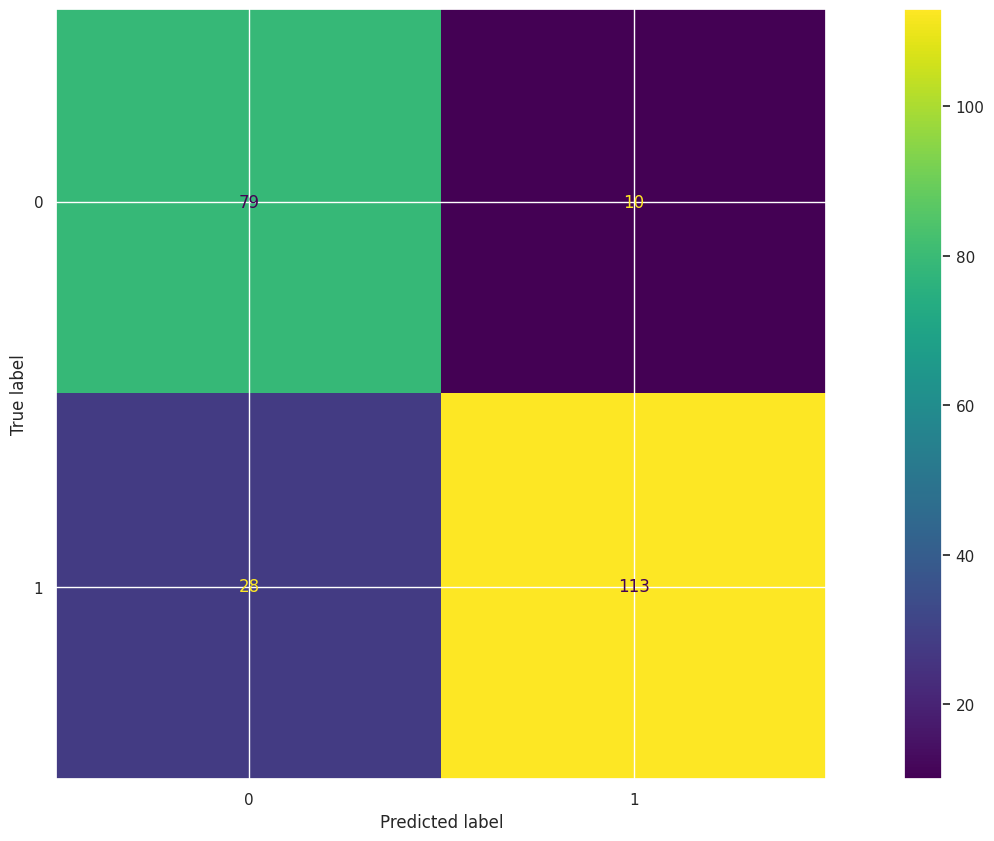

In [22]:
ConfusionMatrixDisplay.from_predictions(y_test, y_prediccionCNB)

*Representar gráficamente la clasificación obtenida (matríz de confusión).*

- **BernoulliNB**

_Elegir, instanciar y entrenar modelo_

In [23]:
modeloBNB = BernoulliNB() #0.830434
modeloBNB.fit(x_entrenamiento, y_entrenamiento)

BernoulliNB()

_Realizar una prediccón con los datos de prueba_

In [24]:
y_prediccionBNB = modeloBNB.predict(x_test)

**_Evaluación_**

*Mostrar el porcentaje de elementos correctamente clasificados*

In [25]:
print("La probabilidad de acertar es: ", accuracy_score(y_test, y_prediccionBNB))

La probabilidad de acertar es:  0.8304347826086956


*Mostrar la predicción realiza (imprimir la variable con la predicción)*

In [26]:
print(y_prediccionBNB)

[1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1
 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 1 1
 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1
 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1
 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 1
 1 1 1 0 0 0 1 0]


*Representar gráficamente la clasificación obtenida (matríz de confusión).*

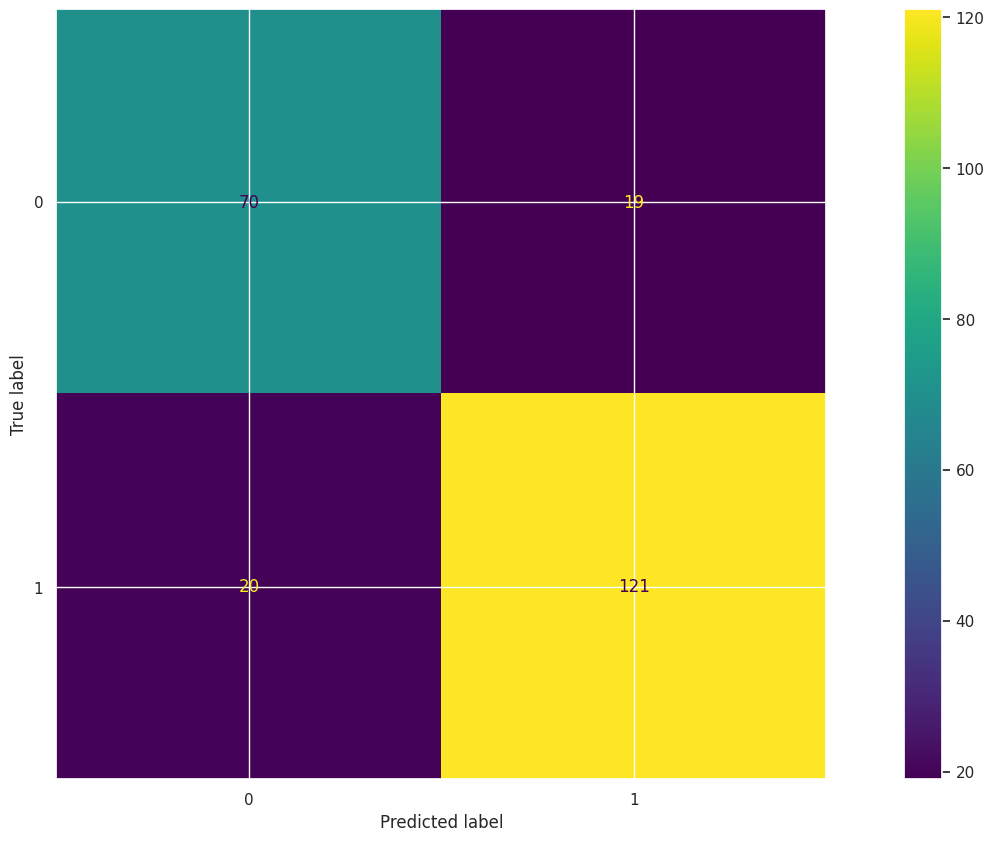

In [27]:
ConfusionMatrixDisplay.from_predictions(y_test, y_prediccionBNB)

- **CategoricalNB**

_Elegir, instanciar y entrenar modelo_

In [28]:
x_columnas = x_df_cardio[:, 1:11]
x_entrenamiento_prueba, x_test_prueba, y_entrenamiento_prueba, y_test_prueba = train_test_split(x_columnas, y_df_cardio, random_state=1, test_size=0.25)
modeloCatNB = CategoricalNB()
modeloCatNB.fit(x_entrenamiento_prueba, y_entrenamiento_prueba)

CategoricalNB()

_Realizar una prediccón con los datos de prueba_

In [29]:
y_prediccionCatNB = modeloCatNB.predict(x_test_prueba)

**_Evaluación_**

*Mostrar el porcentaje de elementos correctamente clasificados*

In [30]:
print("La probabilidad de acertar es: ", accuracy_score(y_test_prueba, y_prediccionCatNB))

La probabilidad de acertar es:  0.8782608695652174


*Mostrar la predicción realiza (imprimir la variable con la predicción)*

In [31]:
print(y_prediccionCatNB)

[1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1
 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1
 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1
 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0
 1 1 1 0 0 1 1 0]


*Representar gráficamente la clasificación obtenida (matríz de confusión).*

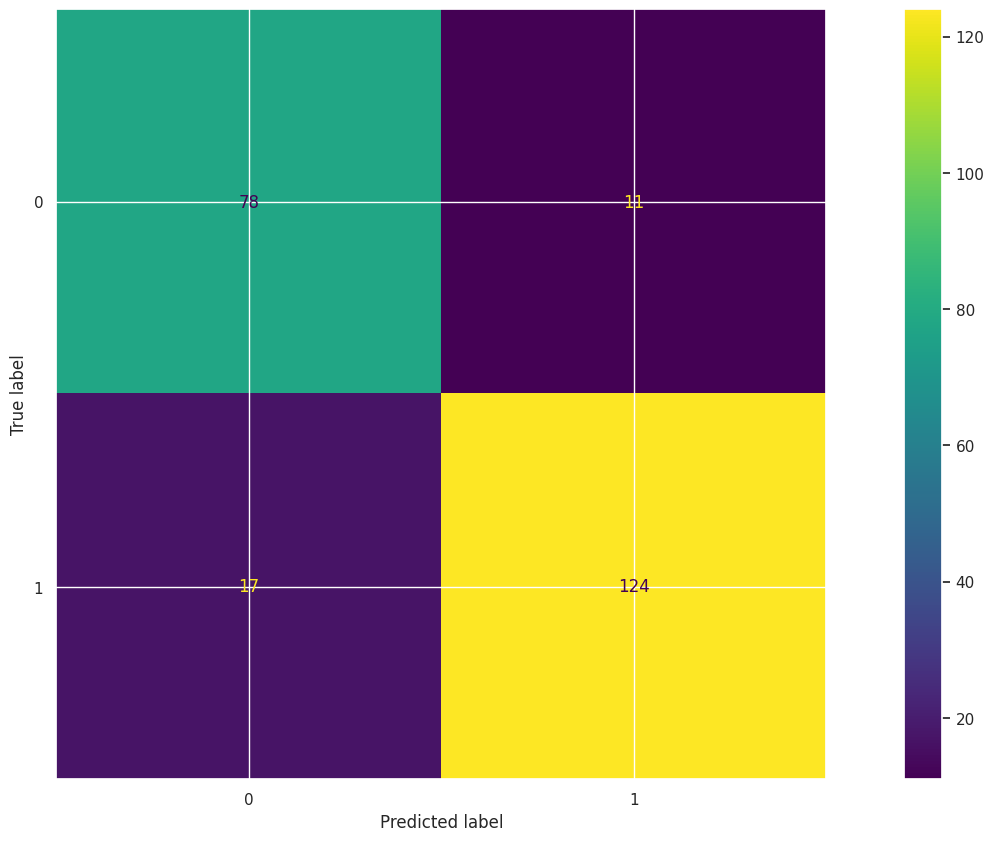

In [32]:
ConfusionMatrixDisplay.from_predictions(y_test, y_prediccionCatNB)

**_Optimización (probar el acceso con distintos clasificadores)_**

*Finalmente prueba los distintos clasificadores y realiza una pequeña comparativa indicando cuál obtiene mejores resultados*

Como se puede observar, el que mejor resultado da es CategoricalNB con una probabilidad de 0.878260. El siguiente sería el modelo GaussianNB con una probabilidad total de 0.860869. Además, exceptuando el modelo GuassianNB se debe tener especial cuidado de que los datos que le pasemos como entrenamiento no sean negativos, para ello hay que escalar los datos. En este caso, lo he realizado con MinMaxScaler. Otro detalle a tener en cuenta es codificar los datos de tipo cadena a numéricos mediante el LabelEncoder. Un dato curioso es como tratar los datos con el modelo CategoricalNB, este utilizando los datos que he utilizado con los demás modelos no ha funcionado e incluso daba error sobre el axis = 1, aunque el error no tenga nada que ver la realidad.

In [33]:
print("La probabilidad de acertar con GaussianNB es:", accuracy_score(y_test, y_prediccionGNB))
print("La probabilidad de acertar con MultinomialNB es:", accuracy_score(y_test, y_prediccionMNB))
print("La probabilidad de acertar con ComplementNB es:", accuracy_score(y_test, y_prediccionCNB))
print("La probabilidad de acertar con BernoulliNB es:", accuracy_score(y_test, y_prediccionBNB))
print("La probabilidad de acertar con CategoricalNB es:", accuracy_score(y_test, y_prediccionCatNB))

La probabilidad de acertar con GaussianNB es: 0.8608695652173913
La probabilidad de acertar con MultinomialNB es: 0.8434782608695652
La probabilidad de acertar con ComplementNB es: 0.8347826086956521
La probabilidad de acertar con BernoulliNB es: 0.8304347826086956
La probabilidad de acertar con CategoricalNB es: 0.8782608695652174
